In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
print(tf.__version__)
print(keras.__version__)

2.9.0
2.9.0


In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
X_train_full.shape

(60000, 28, 28)

In [5]:
X_train_full.dtype

dtype('uint8')

In [6]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

In [7]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", 
               "Shirt", "Sneaker", "Bag", "Ankle Boot"]

In [9]:
len(class_names)

10

In [8]:
class_names[y_train[0]]

'Coat'

In [10]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28])) # Flatten layer transforms image to 1D array
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2023-02-22 21:41:09.065253: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-22 21:41:09.065864: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [12]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.layers

In [16]:
hidden1 = model.layers[1]

In [17]:
hidden1.name

'dense_3'

In [19]:
model.get_layer('dense_3') is hidden1

True

In [20]:
weights, biases = hidden1.get_weights()

In [21]:
weights

array([[-0.02800443,  0.04855824,  0.02751914, ...,  0.00960008,
        -0.00796123, -0.0133522 ],
       [ 0.01611954,  0.00144831, -0.02820668, ...,  0.00065094,
         0.01651683,  0.04379861],
       [-0.0437861 ,  0.00658993, -0.05881778, ..., -0.04739716,
        -0.03433928,  0.03154709],
       ...,
       [-0.00350509,  0.04625763,  0.02062563, ...,  0.03252264,
        -0.00028712, -0.05172993],
       [ 0.04167175,  0.01196171,  0.00652634, ..., -0.07023708,
         0.03556088,  0.0264007 ],
       [ 0.01406019, -0.02540822, -0.0418445 , ..., -0.06002566,
        -0.03875675, -0.05263955]], dtype=float32)

In [22]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [24]:
weights.shape

(784, 300)

In [26]:
biases.shape

(300,)

In [27]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [28]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30


2023-02-22 23:08:15.233701: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-02-22 23:08:15.509952: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - ETA: 0s - loss: 0.7296 - accuracy: 0.7601

2023-02-22 23:08:26.585267: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - 12s 6ms/step - loss: 0.7296 - accuracy: 0.7601 - val_loss: 0.4976 - val_accuracy: 0.8340
Epoch 2/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4899 - accuracy: 0.8282 - val_loss: 0.4524 - val_accuracy: 0.8476
Epoch 3/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4433 - accuracy: 0.8459 - val_loss: 0.4154 - val_accuracy: 0.8612
Epoch 4/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4148 - accuracy: 0.8550 - val_loss: 0.4071 - val_accuracy: 0.8596
Epoch 5/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3954 - accuracy: 0.8607 - val_loss: 0.3876 - val_accuracy: 0.8692
Epoch 6/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3782 - accuracy: 0.8677 - val_loss: 0.4040 - val_accuracy: 0.8554
Epoch 7/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3642 - accuracy: 0.8721 - val_loss: 0.3713 - val_accuracy: 0.8

<function matplotlib.pyplot.show(close=None, block=None)>

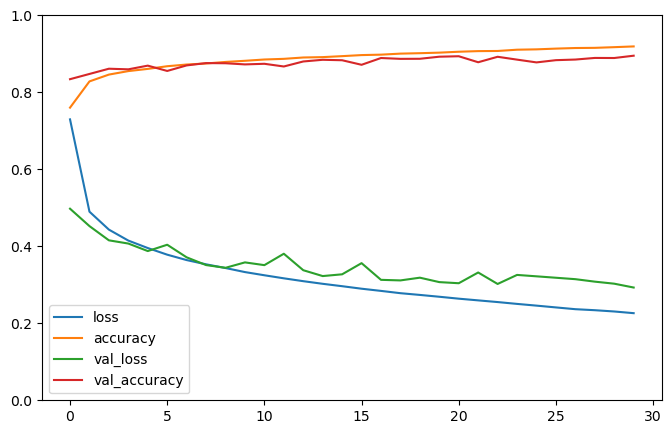

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(False)
plt.gca().set_ylim(0, 1)
plt.show

In [32]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.3319 - accuracy: 0.8813


[0.3318566679954529, 0.8813000321388245]

In [33]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

2023-02-22 23:28:39.198121: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 304ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [40]:
import numpy as np
y_preds = np.argmax(y_proba, axis=1)
y_preds

array([9, 2, 1])

In [41]:
np.array(class_names)[y_preds]

array(['Ankle Boot', 'Pullover', 'Trouser'], dtype='<U11')

In [42]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)